<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-V2" data-toc-modified-id="Общий-вывод-по-проекту-V2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту V2</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-V3" data-toc-modified-id="Общий-вывод-по-проекту-V3-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><b>Общий вывод по проекту V3</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем инструменты, необходимые для подготовки данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Посмотрим на данные

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце Tenure существуют пропуски, необходимо их заменить на 0, так как логично предположить, что это новые клиенты банка.

In [4]:
data['Tenure'] = data['Tenure'].fillna(0)
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Так как данные в объектах не все являются числовыми, а наша задача является задачей классификации, то для того, чтобы применять такие ML-модели классификации, необходимо применить прямое кодирование. После чего, разделить выборки на обучающую, валидационную и тестовую выборки. 

In [6]:
data_new = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [7]:
data_ohe = pd.get_dummies(data_new, drop_first=True)

In [8]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=12345)


In [9]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


## Исследование задачи

Так как мы имеем дело с задачей классификацией
Импортируем модели машинного обучения: логистическую регрессию, решающее дерево и случайный лес.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Импортируем инструменты, которые необходимы для оценки обученных моделей.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle



Обучим модель логистической регрессии

In [12]:
lg_best_iter = 0
lg_best_f1 = 0

for iterat in range(100, 1000, 50):
    model = LogisticRegression(solver='liblinear', max_iter=iterat, random_state=12345)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    if f1 > lg_best_f1:
        lg_best_f1 = f1
        lg_best_iter = iterat

print('Best F1:', lg_best_f1)
print('Best iteration:', lg_best_iter)


Best F1: 0.10290827740492169
Best iteration: 100


In [13]:
model = LogisticRegression(solver='liblinear', max_iter=lg_best_iter, random_state=12345)
model.fit(features_train, target_train)

predict_train = model.predict(features_train)
predict_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('Accuracy train', accuracy_score(target_train, predict_train))
print('Accuracy valid', accuracy_score(target_valid, predict_valid))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Accuracy train 0.7915
Accuracy valid 0.7995
AUC-ROC: 0.6812399561927076


Обучим модель решающего дерева

In [14]:
dt_best_f1 = 0
dt_best_depth = 0
dt_best_leafs = 0

for depth in range(1, 25, 1):
    for leaf in range(1, 30, 1):
        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=12345)
        model.fit(features_train, target_train)
        predict_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predict_valid)
        if f1 > dt_best_f1:
            dt_best_f1 = f1
            dt_best_depth = depth
            dt_best_leafs = leaf

print('Best F1:', dt_best_f1)
print('Best depth:', dt_best_depth)
print('Best leaf:', dt_best_leafs)



Best F1: 0.5685131195335276
Best depth: 10
Best leaf: 15


In [15]:
model = DecisionTreeClassifier(max_depth=dt_best_depth, min_samples_leaf=dt_best_leafs, random_state=12345)
model.fit(features_train, target_train)

predict_train = model.predict(features_train)
predict_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('Accuracy train', accuracy_score(target_train, predict_train))
print('Accuracy valid', accuracy_score(target_valid, predict_valid))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Accuracy train 0.8771666666666667
Accuracy valid 0.852
AUC-ROC: 0.7999527911253674


Обучим модель случайного леса

In [16]:
fr_best_f1 = 0
fr_best_depth = 0
fr_best_est = 0
for est in range(5, 100, 5):
    for depth in range(1, 16, 1):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predict_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predict_valid)
        if f1 > fr_best_f1:
            fr_best_f1 = f1
            fr_best_depth = depth
            fr_best_est = est
            
print('Best F1:', fr_best_f1)
print('Best depth:', fr_best_depth)
print('Best est:', fr_best_est)


Best F1: 0.5691318327974277
Best depth: 13
Best est: 40


In [17]:
model = RandomForestClassifier(n_estimators=fr_best_est, max_depth=fr_best_depth, random_state=12345)
model.fit(features_train, target_train)

predict_train = model.predict(features_train)
predict_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print('Accuracy train', accuracy_score(target_train, predict_train))
print('Accuracy valid', accuracy_score(target_valid, predict_valid))

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Accuracy train 0.9538333333333333
Accuracy valid 0.866
AUC-ROC: 0.8423676601723998


Все модели не удовлетворяют требованиям поставленной задачи. Самое высокое значение у F1 равно 0.5691. Проблема качества модели скорее всего в дисбалансе классов, то есть значащие параметры "весят" меньше, чем наименее значащие. \
Однако стоит заметить, что ML-моделям не свойственно переобучаться, что было показано в значении accuracy обучающей и валидационной выборках.

## Борьба с дисбалансом

**Сбалансируем модель, протестируем работу Логистической регрессии**

In [18]:
model = LogisticRegression(solver='liblinear', max_iter=lg_best_iter, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)

predict_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predict_valid))


F1 0.4491803278688524


Узнаем, как много положительных и отрицательных объектов в обучающей выборке

In [19]:
features_ones = features_train[target_train == 1]
features_zeros = features_train[target_train == 0]
target_ones = target_train[target_train == 1]
target_zeros = target_train[target_train == 0]

print(features_ones.shape)
print(features_zeros.shape)
print(target_ones.shape)
print(target_zeros.shape)

(1219, 11)
(4781, 11)
(1219,)
(4781,)


Количество положительных превосходит отрицательные примерно в 4 раза. Это существенное отличие в обучающей выборке, поэтому стоит изменить .

In [20]:
features_upsampled = pd.concat([features_zeros] + [features_ones] * 4)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 4)

features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)



Применим два метода по устранению дисбаланса классов
1. Upsampling 
2. class_weight='balanced'

<b><font color='green'>Метод class_weight='balanced'</font></b>

In [21]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))

Лучший порог = 0.56 | Лучший F1 = 0.460


Лучшее значение F1 = 0.49 при пороге = 0.54 \
Теперь проверим значение метрики AUC-ROC, но для начала построим эту кривую 

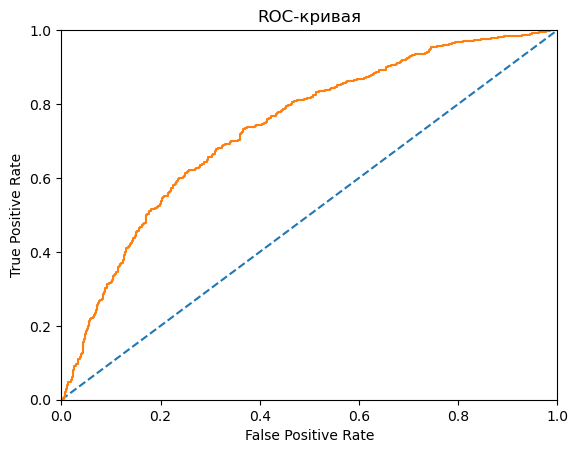

In [22]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [23]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7357399792408114


Сравним значения лучшее значение F1 и AUC-ROC

In [24]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.460446247464503
AUC-ROC: 0.7357399792408114


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Показатель F1 не удовлетворяет условию задачи. Необходимо провести то же исследование для других моделей классификации.

<b><font color='green'>Метод Upsampling</font></b>

In [25]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))



Лучший порог = 0.56 | Лучший F1 = 0.450


Лучшее значение F1 = 0.45 при пороге = 0.56 \
Теперь проверим значение метрики AUC-ROC, но для начала построим эту кривую 

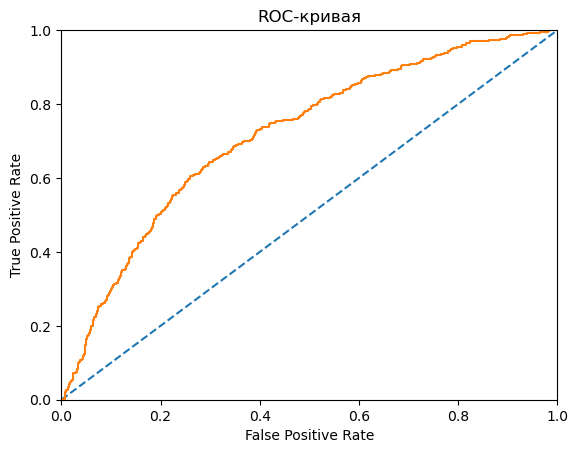

In [26]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [27]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.7170328665959859


Сравним значения лучшее значение F1 и AUC-ROC

In [28]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.4496578690127077
AUC-ROC: 0.7170328665959859


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Показатель F1 не удовлетворяет условию задачи. Необходимо провести то же исследование для других моделей классификации.

<b><font color='green'>Общий вывод двух методов</font></b>

Для Логистической регрессии больше подходит метод class_weight: показатель F1 выше

**Сбалансируем и протестируем работу модели решающего дерева**

<b><font color='green'>Метод class_weight='balanced'</font></b>

In [29]:
best_f1 = 0
best_depth = 0
for depth in range(1, 25, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Best F1', best_f1)
print('Best depth', best_depth)

Best F1 0.5587044534412956
Best depth 6


Модель решающего дерева существенно лучше. Применим метод порога классификации

In [30]:
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))

Лучший порог = 0.58 | Лучший F1 = 0.565


Проверим значение метрики AUC-ROC, но для начала построим эту кривую 

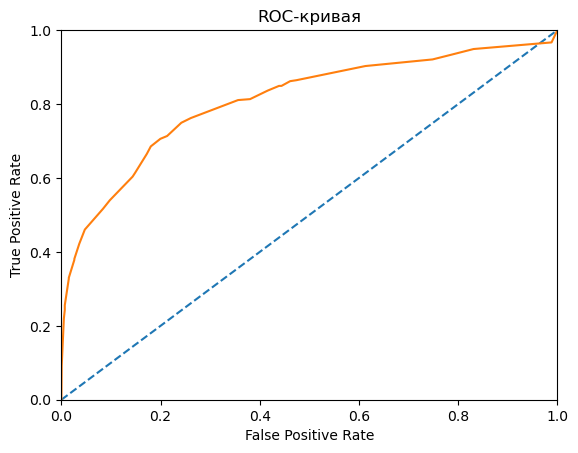

In [31]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [32]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8089018134883863


Сравним значения лучшее значение F1 и AUC-ROC

In [33]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.5648050579557429
AUC-ROC: 0.8089018134883863


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Показатель F1 уже гораздо лучше в решающем дереве, чем в логистической регрессии, но все же не удовлетворяет условию задачи. Необходимо провести то же исследование на случайном лесе.

<b><font color='green'>Метод Upsampling</font></b>

In [34]:
best_f1 = 0
best_depth = 0
for depth in range(1, 25, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Best F1', best_f1)
print('Best depth', best_depth)


Best F1 0.5587044534412956
Best depth 6


Модель решающего дерева существенно лучше. Применим метод порога классификации

In [35]:
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))


Лучший порог = 0.58 | Лучший F1 = 0.565


Проверим значение метрики AUC-ROC, но для начала построим эту кривую 

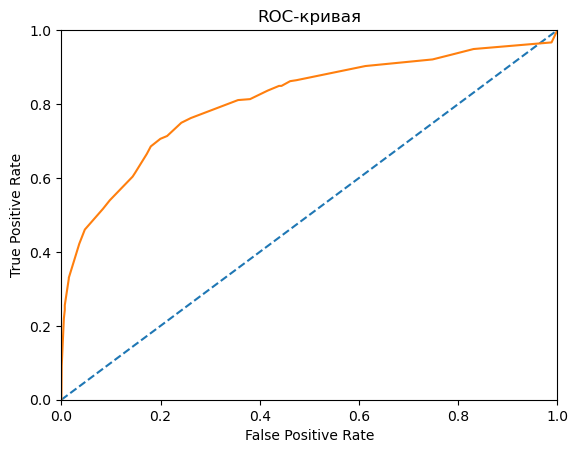

In [36]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [37]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8088890972931989


Сравним значения лучшее значение F1 и AUC-ROC

In [38]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.5648050579557429
AUC-ROC: 0.8088890972931989


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Показатель F1 уже гораздо лучше в решающем дереве, чем в логистической регрессии, но все же не удовлетворяет условию задачи. Необходимо провести то же исследование на случайном лесе.

<b><font color='green'>Общий вывод двух методов</font></b>

После применения двух методов результаты исследуемых метрик оказались полностью одинаковыми.

**Сбалансируем и протестируем работу модели случайного леса**

<b><font color='green'>Метод class_weight='balanced'</font></b>

In [39]:
best_f1 = 0
best_depth = 0
for depth in range(1, 25, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, class_weight='balanced', random_state=12345)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Best F1', best_f1)
print('Best depth', best_depth)

Best F1 0.5852981969486823
Best depth 12


In [40]:
model = RandomForestClassifier(n_estimators=60, max_depth=best_depth, class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predict_valid)

print('F1:', f1)


F1: 0.6011080332409972


Модель случайного леса лучше, чем модель решающего дерева. Применим метод порога классификации

In [41]:
model = RandomForestClassifier(n_estimators=60, max_depth=best_depth, class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))

Лучший порог = 0.50 | Лучший F1 = 0.601


Проверим значение метрики AUC-ROC, но для начала построим эту кривую 

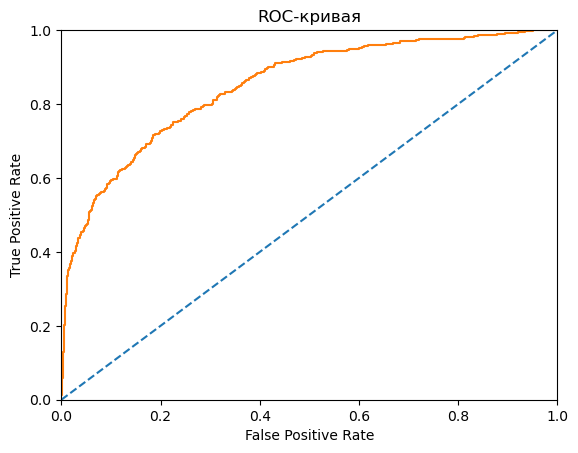

In [42]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [43]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8494116375439306


Сравним значения лучшее значение F1 и AUC-ROC

In [44]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.6011080332409972
AUC-ROC: 0.8494116375439306


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Лучший показатель F1 у случайного леса с генеральными параметрами: количество деревьев 60, глубина 13.

<b><font color='green'>Метод Upsampling</font></b>

In [45]:
best_f1 = 0
best_depth = 0
for depth in range(1, 25, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predict_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Best F1', best_f1)
print('Best depth', best_depth)

Best F1 0.5896860986547086
Best depth 10


In [46]:
model = RandomForestClassifier(n_estimators=60, max_depth=best_depth, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predict_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predict_valid)

print('F1:', f1)


F1: 0.5865168539325842


In [47]:
model = RandomForestClassifier(n_estimators=60, max_depth=best_depth, random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

best_threshold = 0
best_f1 = 0

for threshold in np.arange(0, 0.8, 0.02):
    predict_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predict_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
print("Лучший порог = {:.2f} | Лучший F1 = {:.3f}".format(best_threshold, best_f1))

Лучший порог = 0.60 | Лучший F1 = 0.593


Проверим значение метрики AUC-ROC, но для начала построим эту кривую 

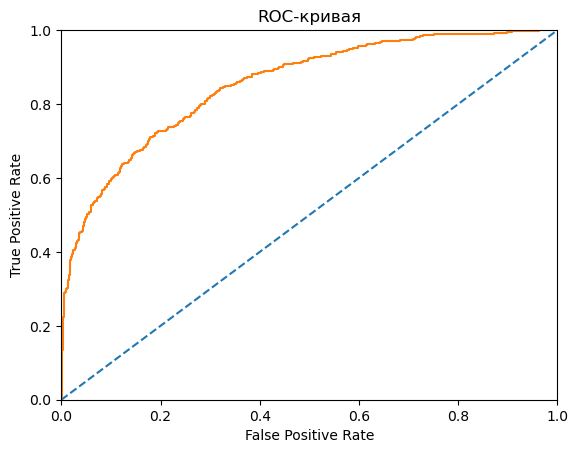

In [48]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [49]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8527067216218235


Сравним значения лучшее значение F1 и AUC-ROC

In [50]:
predict_valid = probabilities_one_valid > best_threshold
f1 = f1_score(target_valid, predict_valid)
print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.5929919137466306
AUC-ROC: 0.8527067216218235


Показатель AUC-ROC как и показатель F1 должны быть как можно выше, чем ближе к 1, тем качественнее модель. Лучший показатель F1 у случайного леса с генеральными параметрами: количество деревьев 60, глубина 10.

<b><font color='green'>Общий вывод двух методов</font></b>

Значение метрики F1 немного лучше в методе class_weight, чем в методе upsampling, однако с метрикой AUC-ROC наоборот.

## Тестирование модели

Для тестовой выборки будем использовать модель Случайный лес, так как у нее наиболее высокий показатель F1 и AUC-ROC.

<b><font color='green'>Метод class_weight='balanced'</font></b>

In [51]:
model = RandomForestClassifier(n_estimators=60, max_depth=13, random_state=12345)
model.fit(features_train, target_train)
predict_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predict_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.5522388059701492
AUC-ROC: 0.8637524919194068


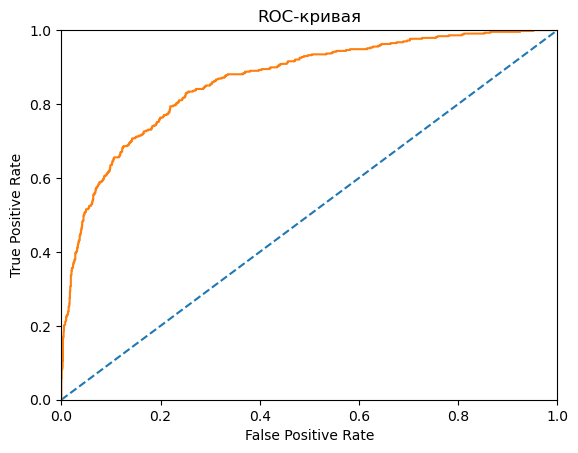

In [52]:
fpr, tpr, threshold = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

<b><font color='green'>Метод Upsampling</font></b>

In [53]:
model = RandomForestClassifier(n_estimators=60, max_depth=10, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predict_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
f1 = f1_score(target_test, predict_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print('F1:', f1)
print('AUC-ROC:', auc_roc)

F1: 0.6439232409381663
AUC-ROC: 0.867296637788441


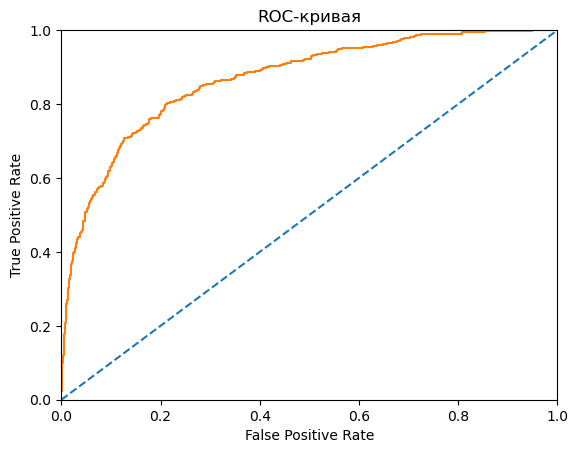

In [54]:
fpr, tpr, threshold = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='-')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

**Итоги** \
В ходе исследования мы выяснили, что самой эффективной моделью в этой задаче является Случайный лес с методом дисбаланса класса Upsampling. Для оценки качества модели в целом, стоит пользоваться совокупной метрикой F1. Как и AUC, F1 должна стремиться к 1, показывая тем самым качество модели. В ходе исследования нам удалось достичь значение метрики F1 равное 0.6439, а AUC-ROC равн

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*